In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
path = keras.utils.get_file('slump_test.data','https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data')

8192/4758 [===================================================] - 0s 0us/step


In [164]:
column_names = ['Cement','Slag','Fly ash','Water','SP','Coarse Aggr.','Fine Aggr.','SLUMP (cm)','FLOW (cm)','28-day Compressive Strength (Mpa)']


dataset = pd.read_csv(path,sep=',')

In [165]:
dataset.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [166]:
dataset.pop('No')
dataset.shape

(103, 10)

In [167]:
dataset.isna().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [168]:
t=dataset.iloc[100:,:]
dataset=dataset.iloc[:100,:]
dataset

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
95,184.3,153.4,239.2,179.0,7.5,920.2,640.9,0.0,20.0,41.01
96,215.6,112.9,239.0,198.7,7.4,884.0,649.1,27.5,64.0,39.13
97,295.3,0.0,239.9,236.2,8.3,780.3,722.9,25.0,77.0,44.08
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97


In [169]:
output_=dataset.iloc[:,7:]
dataset=dataset.iloc[:,:7]
dataset

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0
...,...,...,...,...,...,...,...
95,184.3,153.4,239.2,179.0,7.5,920.2,640.9
96,215.6,112.9,239.0,198.7,7.4,884.0,649.1
97,295.3,0.0,239.9,236.2,8.3,780.3,722.9
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6


In [170]:
d=dataset.describe()
d=d.transpose()
d

,count,mean,std,min,25%,50%,75%,max
Cement,100.0,227.745,78.796252,137.0,151.60,204.95,303.850,374.0
Slag,100.0,79.023,60.737837,0.0,0.00,101.00,126.250,193.0
Fly ash,100.0,146.459,85.375564,0.0,115.00,163.50,228.975,260.0
Water,100.0,197.305,20.359191,160.0,180.00,196.00,210.000,240.0
SP,100.0,8.549,2.844257,4.4,6.00,8.15,10.000,19.0
Coarse Aggr.,100.0,884.158,88.974438,708.0,820.25,878.50,953.075,1049.9
Fine Aggr.,100.0,741.234,62.938786,640.6,685.75,742.85,789.000,902.0


In [171]:
norm_data = (dataset - d['mean'])/d['std']   #vectorize implementation
norm_data.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
0,0.574329,0.049014,-0.485607,0.623551,0.158565,0.223008,-0.972914
1,-0.821676,1.152115,0.521707,-0.849985,1.213322,-0.462582,0.075724
2,-0.834367,1.135651,0.521707,-0.899103,2.619665,-0.496300,0.028059
3,-0.834367,1.135651,0.509994,-0.899103,3.674422,-0.518778,-0.003718
4,-0.935895,0.542940,-0.028802,1.114730,0.510151,0.436552,-1.322460


In [172]:
dataset.tail()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.
95,184.3,153.4,239.2,179.0,7.5,920.2,640.9
96,215.6,112.9,239.0,198.7,7.4,884.0,649.1
97,295.3,0.0,239.9,236.2,8.3,780.3,722.9
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1


In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test = train_test_split(norm_data,output_,test_size=0.2,shuffle=True)

In [192]:
model=keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(3)
])

In [193]:
model.compile(optimizer=keras.optimizers.Adam(0.007),loss='mse',metrics=['accuracy'])

In [194]:
tf.keras.backend.set_floatx('float64')
history=model.fit(x_train,y_train,batch_size=32,epochs=1000)

Epoch 1/1000
3/3 [==============================] - 0s 2ms/step - loss: 1449.2846 - accuracy: 0.3125
Epoch 2/1000
3/3 [==============================] - 0s 3ms/step - loss: 1424.8680 - accuracy: 0.4625
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 1396.9790 - accuracy: 0.5250
Epoch 4/1000
3/3 [==============================] - 0s 5ms/step - loss: 1365.1375 - accuracy: 0.5875
Epoch 5/1000
3/3 [==============================] - 0s 4ms/step - loss: 1328.2872 - accuracy: 0.6375
Epoch 6/1000
3/3 [==============================] - 0s 3ms/step - loss: 1285.6919 - accuracy: 0.6625
Epoch 7/1000
3/3 [==============================] - 0s 4ms/step - loss: 1233.3654 - accuracy: 0.7125
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 1174.4322 - accuracy: 0.7250
Epoch 9/1000
3/3 [==============================] - 0s 3ms/step - loss: 1105.2729 - accuracy: 0.7625
Epoch 10/1000
3/3 [==============================] - 0s 3ms/step - loss: 1026.1708 - accura

3/3 [==============================] - 0s 3ms/step - loss: 100.5177 - accuracy: 0.7625
Epoch 82/1000
3/3 [==============================] - 0s 3ms/step - loss: 99.5266 - accuracy: 0.7625
Epoch 83/1000
3/3 [==============================] - 0s 2ms/step - loss: 98.8262 - accuracy: 0.7625
Epoch 84/1000
3/3 [==============================] - 0s 2ms/step - loss: 97.7368 - accuracy: 0.7625
Epoch 85/1000
3/3 [==============================] - 0s 2ms/step - loss: 96.6389 - accuracy: 0.7625
Epoch 86/1000
3/3 [==============================] - 0s 3ms/step - loss: 95.6150 - accuracy: 0.7625
Epoch 87/1000
3/3 [==============================] - 0s 3ms/step - loss: 94.7459 - accuracy: 0.7625
Epoch 88/1000
3/3 [==============================] - 0s 3ms/step - loss: 93.9557 - accuracy: 0.7625
Epoch 89/1000
3/3 [==============================] - 0s 3ms/step - loss: 93.0436 - accuracy: 0.7625
Epoch 90/1000
3/3 [==============================] - 0s 3ms/step - loss: 92.4431 - accuracy: 0.7625
Epoch 91/1000

3/3 [==============================] - 0s 4ms/step - loss: 65.9147 - accuracy: 0.9125
Epoch 163/1000
3/3 [==============================] - 0s 4ms/step - loss: 65.6525 - accuracy: 0.9125
Epoch 164/1000
3/3 [==============================] - 0s 3ms/step - loss: 65.6138 - accuracy: 0.9125
Epoch 165/1000
3/3 [==============================] - 0s 3ms/step - loss: 65.6450 - accuracy: 0.9125
Epoch 166/1000
3/3 [==============================] - 0s 2ms/step - loss: 65.4476 - accuracy: 0.9125
Epoch 167/1000
3/3 [==============================] - 0s 3ms/step - loss: 65.3282 - accuracy: 0.9125
Epoch 168/1000
3/3 [==============================] - 0s 3ms/step - loss: 64.9908 - accuracy: 0.9125
Epoch 169/1000
3/3 [==============================] - 0s 2ms/step - loss: 64.9859 - accuracy: 0.9125
Epoch 170/1000
3/3 [==============================] - 0s 2ms/step - loss: 64.7716 - accuracy: 0.9125
Epoch 171/1000
3/3 [==============================] - 0s 5ms/step - loss: 64.5378 - accuracy: 0.9125
Epoch

3/3 [==============================] - 0s 2ms/step - loss: 57.9216 - accuracy: 0.9250
Epoch 243/1000
3/3 [==============================] - 0s 3ms/step - loss: 58.1975 - accuracy: 0.9125
Epoch 244/1000
3/3 [==============================] - ETA: 0s - loss: 46.7891 - accuracy: 0.875 - 0s 3ms/step - loss: 58.0419 - accuracy: 0.9125
Epoch 245/1000
3/3 [==============================] - 0s 2ms/step - loss: 58.0056 - accuracy: 0.9125
Epoch 246/1000
3/3 [==============================] - 0s 3ms/step - loss: 57.9501 - accuracy: 0.9250
Epoch 247/1000
3/3 [==============================] - 0s 2ms/step - loss: 57.4824 - accuracy: 0.9375
Epoch 248/1000
3/3 [==============================] - 0s 2ms/step - loss: 57.4082 - accuracy: 0.9250
Epoch 249/1000
3/3 [==============================] - 0s 3ms/step - loss: 57.4593 - accuracy: 0.9375
Epoch 250/1000
3/3 [==============================] - 0s 4ms/step - loss: 57.3301 - accuracy: 0.9375
Epoch 251/1000
3/3 [==============================] - 0s 3ms/s

3/3 [==============================] - 0s 2ms/step - loss: 54.0328 - accuracy: 0.9375
Epoch 323/1000
3/3 [==============================] - 0s 3ms/step - loss: 53.6449 - accuracy: 0.9375
Epoch 324/1000
3/3 [==============================] - 0s 2ms/step - loss: 53.5153 - accuracy: 0.9250
Epoch 325/1000
3/3 [==============================] - 0s 2ms/step - loss: 53.8863 - accuracy: 0.9250
Epoch 326/1000
3/3 [==============================] - 0s 2ms/step - loss: 53.4182 - accuracy: 0.9000
Epoch 327/1000
3/3 [==============================] - 0s 2ms/step - loss: 53.2827 - accuracy: 0.9000
Epoch 328/1000
3/3 [==============================] - 0s 2ms/step - loss: 53.4703 - accuracy: 0.9000
Epoch 329/1000
3/3 [==============================] - 0s 2ms/step - loss: 52.9732 - accuracy: 0.9125
Epoch 330/1000
3/3 [==============================] - 0s 3ms/step - loss: 52.7062 - accuracy: 0.9125
Epoch 331/1000
3/3 [==============================] - 0s 3ms/step - loss: 52.8944 - accuracy: 0.9125
Epoch

3/3 [==============================] - 0s 2ms/step - loss: 43.6561 - accuracy: 0.9375
Epoch 404/1000
3/3 [==============================] - 0s 2ms/step - loss: 43.9298 - accuracy: 0.9375
Epoch 405/1000
3/3 [==============================] - 0s 2ms/step - loss: 44.2992 - accuracy: 0.9250
Epoch 406/1000
3/3 [==============================] - 0s 3ms/step - loss: 43.4352 - accuracy: 0.9125
Epoch 407/1000
3/3 [==============================] - ETA: 0s - loss: 47.6858 - accuracy: 0.875 - 0s 2ms/step - loss: 43.1807 - accuracy: 0.9125
Epoch 408/1000
3/3 [==============================] - 0s 3ms/step - loss: 43.0111 - accuracy: 0.9250
Epoch 409/1000
3/3 [==============================] - 0s 3ms/step - loss: 42.8536 - accuracy: 0.9375
Epoch 410/1000
3/3 [==============================] - 0s 2ms/step - loss: 42.4326 - accuracy: 0.9375
Epoch 411/1000
3/3 [==============================] - 0s 4ms/step - loss: 42.4456 - accuracy: 0.9375
Epoch 412/1000
3/3 [==============================] - 0s 3ms/s

3/3 [==============================] - 0s 4ms/step - loss: 27.1500 - accuracy: 0.9375
Epoch 484/1000
3/3 [==============================] - 0s 4ms/step - loss: 26.9255 - accuracy: 0.9375
Epoch 485/1000
3/3 [==============================] - 0s 2ms/step - loss: 27.4262 - accuracy: 0.9500
Epoch 486/1000
3/3 [==============================] - 0s 4ms/step - loss: 27.1154 - accuracy: 0.9500
Epoch 487/1000
3/3 [==============================] - 0s 2ms/step - loss: 26.6744 - accuracy: 0.9375
Epoch 488/1000
3/3 [==============================] - 0s 4ms/step - loss: 26.2081 - accuracy: 0.9625
Epoch 489/1000
3/3 [==============================] - 0s 2ms/step - loss: 26.7663 - accuracy: 0.9625
Epoch 490/1000
3/3 [==============================] - 0s 2ms/step - loss: 26.4120 - accuracy: 0.9625
Epoch 491/1000
3/3 [==============================] - 0s 2ms/step - loss: 25.9922 - accuracy: 0.9375
Epoch 492/1000
3/3 [==============================] - 0s 2ms/step - loss: 25.7328 - accuracy: 0.9375
Epoch

3/3 [==============================] - 0s 2ms/step - loss: 19.0195 - accuracy: 0.9750
Epoch 564/1000
3/3 [==============================] - 0s 3ms/step - loss: 18.9478 - accuracy: 0.9750
Epoch 565/1000
3/3 [==============================] - 0s 4ms/step - loss: 18.9600 - accuracy: 0.9625
Epoch 566/1000
3/3 [==============================] - 0s 3ms/step - loss: 19.0182 - accuracy: 0.9750
Epoch 567/1000
3/3 [==============================] - 0s 3ms/step - loss: 18.5538 - accuracy: 0.9750
Epoch 568/1000
3/3 [==============================] - 0s 3ms/step - loss: 18.8017 - accuracy: 0.9750
Epoch 569/1000
3/3 [==============================] - 0s 2ms/step - loss: 18.9900 - accuracy: 0.9750
Epoch 570/1000
3/3 [==============================] - 0s 2ms/step - loss: 18.5442 - accuracy: 0.9625
Epoch 571/1000
3/3 [==============================] - 0s 3ms/step - loss: 19.1024 - accuracy: 0.9625
Epoch 572/1000
3/3 [==============================] - 0s 3ms/step - loss: 18.6229 - accuracy: 0.9625
Epoch

3/3 [==============================] - 0s 3ms/step - loss: 15.3174 - accuracy: 0.9750
Epoch 644/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.4295 - accuracy: 0.9750
Epoch 645/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.6772 - accuracy: 0.9750
Epoch 646/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.5835 - accuracy: 0.9750
Epoch 647/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.4284 - accuracy: 0.9750
Epoch 648/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.2819 - accuracy: 0.9750
Epoch 649/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.3846 - accuracy: 0.9750
Epoch 650/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.8487 - accuracy: 0.9750
Epoch 651/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.1279 - accuracy: 0.9750
Epoch 652/1000
3/3 [==============================] - 0s 3ms/step - loss: 15.5534 - accuracy: 0.9750
Epoch

3/3 [==============================] - 0s 3ms/step - loss: 14.0642 - accuracy: 0.9750
Epoch 724/1000
3/3 [==============================] - 0s 2ms/step - loss: 13.8485 - accuracy: 0.9750
Epoch 725/1000
3/3 [==============================] - 0s 3ms/step - loss: 14.4647 - accuracy: 0.9750
Epoch 726/1000
3/3 [==============================] - 0s 3ms/step - loss: 13.7694 - accuracy: 0.9625
Epoch 727/1000
3/3 [==============================] - 0s 4ms/step - loss: 13.2606 - accuracy: 0.9625
Epoch 728/1000
3/3 [==============================] - 0s 3ms/step - loss: 13.8861 - accuracy: 0.9750
Epoch 729/1000
3/3 [==============================] - 0s 3ms/step - loss: 13.6994 - accuracy: 0.9750
Epoch 730/1000
3/3 [==============================] - 0s 6ms/step - loss: 13.9873 - accuracy: 0.9625
Epoch 731/1000
3/3 [==============================] - 0s 4ms/step - loss: 13.8641 - accuracy: 0.9625
Epoch 732/1000
3/3 [==============================] - 0s 5ms/step - loss: 13.5534 - accuracy: 0.9750
Epoch

Epoch 803/1000
3/3 [==============================] - 0s 3ms/step - loss: 11.3938 - accuracy: 0.9625
Epoch 804/1000
3/3 [==============================] - 0s 2ms/step - loss: 11.5415 - accuracy: 0.9750
Epoch 805/1000
3/3 [==============================] - 0s 2ms/step - loss: 11.0919 - accuracy: 0.9625
Epoch 806/1000
3/3 [==============================] - 0s 3ms/step - loss: 11.3506 - accuracy: 0.9625
Epoch 807/1000
3/3 [==============================] - 0s 4ms/step - loss: 11.2502 - accuracy: 0.9625
Epoch 808/1000
3/3 [==============================] - 0s 4ms/step - loss: 11.2593 - accuracy: 0.9625
Epoch 809/1000
3/3 [==============================] - 0s 3ms/step - loss: 11.0105 - accuracy: 0.9625
Epoch 810/1000
3/3 [==============================] - 0s 2ms/step - loss: 11.0995 - accuracy: 0.9625
Epoch 811/1000
3/3 [==============================] - 0s 2ms/step - loss: 11.6005 - accuracy: 0.9625
Epoch 812/1000
3/3 [==============================] - 0s 2ms/step - loss: 11.1273 - accurac

3/3 [==============================] - 0s 3ms/step - loss: 9.7925 - accuracy: 0.9625
Epoch 885/1000
3/3 [==============================] - 0s 2ms/step - loss: 10.1539 - accuracy: 0.9625
Epoch 886/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.6034 - accuracy: 0.9625
Epoch 887/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.7892 - accuracy: 0.9750
Epoch 888/1000
3/3 [==============================] - 0s 4ms/step - loss: 9.4667 - accuracy: 0.9750
Epoch 889/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.3924 - accuracy: 0.9625
Epoch 890/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.5390 - accuracy: 0.9625
Epoch 891/1000
3/3 [==============================] - 0s 4ms/step - loss: 9.4347 - accuracy: 0.9750
Epoch 892/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.6564 - accuracy: 0.9750
Epoch 893/1000
3/3 [==============================] - 0s 6ms/step - loss: 9.5862 - accuracy: 0.9750
Epoch 894/1000

3/3 [==============================] - 0s 2ms/step - loss: 8.4793 - accuracy: 0.9750
Epoch 967/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.6371 - accuracy: 0.9750
Epoch 968/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.6876 - accuracy: 0.9750
Epoch 969/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.0975 - accuracy: 0.9750
Epoch 970/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.6619 - accuracy: 0.9625
Epoch 971/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.1513 - accuracy: 0.9750
Epoch 972/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.0001 - accuracy: 0.9750
Epoch 973/1000
3/3 [==============================] - 0s 3ms/step - loss: 7.8837 - accuracy: 0.9750
Epoch 974/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.0940 - accuracy: 0.9750
Epoch 975/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.0457 - accuracy: 0.9750
Epoch 976/1000


In [195]:
import matplotlib.pyplot as plt
hist=pd.DataFrame(history.history)
hist.head()
a=[]
b=[]
hist['accuracy'][1]
for i in range(len(hist)):
    if i % 28 == 0:
        a.append(hist['accuracy'][i])
        b.append(i)

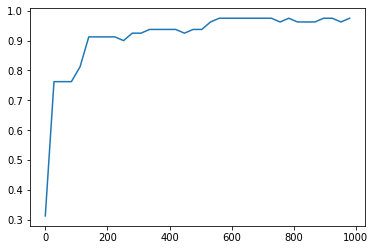

In [196]:
plt.plot(b,a)

In [197]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 91.3484 - accuracy: 0.8500


[91.34839630126953, 0.85]

In [198]:
model.evaluate(t.iloc[:,:7],t.iloc[:,7:])

1/1 [==============================] - 0s 3ms/step - loss: 5105507840.0000 - accuracy: 0.6667


[5105507840.0, 0.6666666666666666]

In [199]:
history.history

{'loss': [1449.2845947265625,
  1424.868017578125,
  1396.9790283203124,
  1365.1374755859374,
  1328.287158203125,
  1285.6918701171876,
  1233.3654052734375,
  1174.432177734375,
  1105.27294921875,
  1026.1707763671875,
  938.259326171875,
  848.4701782226563,
  751.7280639648437,
  651.301953125,
  558.9152709960938,
  472.662890625,
  397.92572021484375,
  336.1401611328125,
  291.1129455566406,
  259.0654663085937,
  235.2234130859375,
  219.6243408203125,
  205.68238220214843,
  192.3412841796875,
  180.6852600097656,
  171.52371826171876,
  164.5749084472656,
  160.01140747070312,
  156.37819213867186,
  153.6146453857422,
  151.30025329589844,
  149.11240234375,
  147.18669738769532,
  145.24411315917968,
  143.42844848632814,
  141.35678253173828,
  139.6049774169922,
  138.28002319335937,
  136.71378479003906,
  135.33364868164062,
  134.14471130371095,
  132.6786880493164,
  131.60389404296876,
  130.52309875488282,
  129.24297637939452,
  128.1769027709961,
  127.232943725